In [2]:
!pip install pandas

In [3]:
"""
import time

from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select

options = Options()
driver = webdriver.Chrome("C:\Program Files\chromedriver_linux64")
download_url = 'https://www.boatrace.jp/owpc/pc/extra/data/download.html'
driver.get(download_url)
time.sleep(7)
html = driver.page_source
soup = BeautifulSoup(html, "lxml")
datas = soup.find('ul', attrs={'class':'data_list h-mt15'})
datas_url = datas.find_all('a')
for data_url in datas_url:
    home_url = 'https://www.boatrace.jp'
    data_url = home_url + data_url.get('href')
    driver.get(data_url)
    time.sleep(5)
driver.close()
"""

In [7]:
"""
import time
from selenium import webdriver #Selenium Webdriverをインポートする
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service

# Serviceオブジェクトを作成
service = Service(ChromeDriverManager().install())

# Serviceオブジェクトを使用してWebDriverを作成
options = Options()
driver = webdriver.Chrome(service=service, options=options)

hall_pref="大阪府"
hall_name="123N+松原"

hp_url=f"https://ana-slo.com/ホールデータ/{hall_pref}/"

time.sleep(5) #5秒待つ。冒頭のimport timeで利用可能なtimeメソッド

search_box = driver.find_element_by_name("q") #DOM操作
 
search_box.send_keys('NakamuraBlog') #Google検索ボックス内に「NakamuraBlog」と入力
search_box.submit() #Google検索ボタンのクリック 
 
time.sleep(5) #5秒待つ。冒頭のimport timeで利用可能なtimeメソッド
 
research_result = driver.find_element_by_partial_link_text("nkmrdai") #検索結果hrefタグ内に「nkmradai」があるリンクを探す
research_result.click() #クリックする。 #このタイミングでNakamuraBlogのトップページが開かれたらOK
 
time.sleep(5) #5秒待つ。冒頭のimport timeで利用可能なtimeメソッド
 
driver.quit() #Chromeブラウザを閉じる
"""

## アナスロデータ収集

### 単体

In [96]:
from datetime import datetime
from urllib.request import urlopen
import random
import csv
import requests
from bs4 import BeautifulSoup
import time
import re
import pandas as pd

# チェリー狙いでのブドウ確率を計算


def calc_grape(game_num, big_num, reg_num, diffrent_piece, model_num):
    # ゲーム数 ビッグ回数 レギュラー回数 差枚数  機種ナンバー
    try:
        if model_num == 1:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*251.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.06068))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*251.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.06068))))/8)*2)
        elif model_num == 2:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.05847))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.05847))))/8)*2)
        elif model_num == 3:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.0603))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.0603))))/8)*2)
        elif model_num == 4:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)*2)
        elif model_num == 5:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)*2)
    except:
        return 0


shop_pref = "兵庫県"
shop_name = "オール湊川"
# 正規表現パターンを定義
pattern = r'\([^)]*\)'

try:
    # 日付を取得するための対象URL
    url = f'https://ana-slo.com/ホールデータ/{shop_pref}/{shop_name}-データ一覧'
    # ウェブページをダウンロード
    response = requests.get(url)

    # ページのコンテンツをBeautiful Soupで解析
    soup = BeautifulSoup(response.text, 'html.parser')
    wait_time = random.uniform(3, 5)
    time.sleep(wait_time)

    div_element = soup.find('div', class_="date-list-area")
    a_elements = div_element.findAll("a")
    days_list = []
    # ここで何日分集めるか指定
    for a_element in a_elements[0:365]:
        days_list.append(a_element.text)
    print(days_list)

    # 入力形式を指定
    input_format = "%Y/%m/%d"
    # 出力形式を指定
    output_format = "%Y-%m-%d"

    column_names = ["日付", "機種名", "台番号", "G数", "差枚", "BB回数",
                    "RB回数", "合成確率", "BB確率", "RB確率", "ブドウ確率"]  # 列名を指定するリストを作成
    df = pd.DataFrame(columns=column_names)
    for day_with_day_of_week in days_list:
        # 正規表現パターンに一致する部分を削除
        print(day_with_day_of_week)
        day = re.sub(pattern, '', day_with_day_of_week)
        # 日付文字列をdatetimeオブジェクトに変換
        date_object = datetime.strptime(day, input_format)
        # 新しい形式で日付を文字列に変換
        output_date_str = date_object.strftime(output_format)

        # スクレイピング対象のURL
        url = f'https://ana-slo.com/{output_date_str}-{shop_name}-data/'
        # ウェブページをダウンロード
        response = requests.get(url)

        # ページのコンテンツをBeautiful Soupで解析
        soup = BeautifulSoup(response.text, 'html.parser')

        wait_time = random.uniform(3, 5)
        time.sleep(wait_time)

        # アイムジャグラーのh4タグのテキストを検索
        h4_text_im = "アイムジャグラーEX-TP"
        h4_element = soup.find('h4', string=h4_text_im)
        if h4_element is not None:
            # h4タグの次の要素（ulタグ）を検索
            ul_element = h4_element.find_next_sibling()
            # ulタグの次の要素（divタグ）を検索
            div_element = ul_element.find_next_sibling()
            # テーブルを指定
            table = div_element.find("table")
            print(shop_name)
            im_rows = table.findAll("tr")
            # 最後の要素を削除
            del im_rows[-1]
        # マイジャグラーのh4タグのテキストを検索
        h4_text_my = "マイジャグラーV"
        h4_element = soup.find('h4', string=h4_text_my)
        my_rows = []
        if h4_element is not None:
            # h4タグの次の要素（ulタグ）を検索
            ul_element = h4_element.find_next_sibling()
            # ulタグの次の要素（divタグ）を検索
            div_element = ul_element.find_next_sibling()
            # テーブルを指定
            table = div_element.find("table")
            my_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del my_rows[0]
            del my_rows[-1]

        # ファンキージャグラーのh4タグのテキストを検索
        h4_text_fanky = "ファンキージャグラー2"
        h4_element = soup.find('h4', string=h4_text_fanky)
        fanky_rows = []
        if h4_element is not None:
            # h4タグの次の要素（ulタグ）を検索
            ul_element = h4_element.find_next_sibling()
            # ulタグの次の要素（divタグ）を検索
            div_element = ul_element.find_next_sibling()
            # テーブルを指定
            table = div_element.find("table")
            fanky_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del fanky_rows[0]
            del fanky_rows[-1]

        # ハッピージャグラーのh4タグのテキストを検索
        h4_text_happy = "ハッピージャグラーVIII"
        h4_element = soup.find('h4', string=h4_text_happy)
        happy_rows = []
        if h4_element is not None:
            # h4タグの次の要素（ulタグ）を検索
            ul_element = h4_element.find_next_sibling()
            # ulタグの次の要素（divタグ）を検索
            div_element = ul_element.find_next_sibling()
            # テーブルを指定
            table = div_element.find("table")
            happy_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del happy_rows[0]
            del happy_rows[-1]

        # ゴーゴージャグラーのh4タグのテキストを検索
        h4_text_gogo = "ゴーゴージャグラー3"
        h4_element = soup.find('h4', string=h4_text_gogo)
        gogo_rows = []
        if h4_element is not None:
            # h4タグの次の要素（ulタグ）を検索
            ul_element = h4_element.find_next_sibling()
            # ulタグの次の要素（divタグ）を検索
            div_element = ul_element.find_next_sibling()
            # テーブルを指定
            table = div_element.find("table")
            gogo_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del gogo_rows[0]
            del gogo_rows[-1]

        for row in im_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            if csvRow[0] == "台番号":
                pass
            else:
                if len(csvRow) == 10:
                    # 6個目のARTと10個目のART確率を削除
                    del csvRow[5]
                    del csvRow[8]
                elif len(csvRow) < 7:
                    break
                csvRow.insert(0, date_object)
                csvRow.insert(1, f"アイムジャグラーEX-TP")
                for i in range(5):
                    csvRow[i+2] = csvRow[i+2].replace(',', '')
                    csvRow[i+2] = csvRow[i+2].replace('+', '')
                    csvRow[i+2] = int(csvRow[i+2])
                csvRow.append(calc_grape(
                    csvRow[3], csvRow[5], csvRow[6], csvRow[4], 1))
                df.loc[len(df)] = csvRow

        for row in my_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break

            csvRow.insert(0, date_object)
            csvRow.insert(1, f"マイジャグラーV")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 2))
            df.loc[len(df)] = csvRow

        for row in fanky_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break
            csvRow.insert(0, date_object)
            csvRow.insert(1, f"ファンキージャグラー2")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 3))
            df.loc[len(df)] = csvRow

        for row in happy_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break
            csvRow.insert(0, date_object)
            csvRow.insert(1, f"ハッピージャグラーVIII")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 4))
            df.loc[len(df)] = csvRow

        for row in gogo_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break
            csvRow.insert(0, date_object)
            csvRow.insert(1, f"ゴーゴージャグラー3")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 4))
            df.loc[len(df)] = csvRow

    df.to_csv(f"CSV一覧/{shop_name}.csv", index=False, encoding="shift-jis")
    print("終了")
except Exception as e:
    df.to_csv(f"CSV一覧/{shop_name}.csv", index=False, encoding="shift-jis")
    print(e)
    print(f"{shop_name}、異常終了")
    pass


['2023/09/24(日)', '2023/09/23(土)', '2023/09/22(金)', '2023/09/21(木)', '2023/09/20(水)', '2023/09/19(火)', '2023/09/18(月)', '2023/09/17(日)', '2023/09/16(土)', '2023/09/15(金)', '2023/09/14(木)', '2023/09/13(水)', '2023/09/12(火)', '2023/09/11(月)', '2023/09/10(日)', '2023/09/09(土)', '2023/09/08(金)', '2023/09/07(木)', '2023/09/06(水)', '2023/09/05(火)', '2023/09/03(日)', '2023/09/02(土)', '2023/09/01(金)', '2023/08/31(木)', '2023/08/30(水)', '2023/08/29(火)', '2023/08/28(月)', '2023/08/27(日)', '2023/08/26(土)', '2023/08/25(金)', '2023/08/24(木)', '2023/08/23(水)', '2023/08/22(火)', '2023/08/21(月)', '2023/08/20(日)', '2023/08/19(土)', '2023/08/18(金)', '2023/08/17(木)', '2023/08/16(水)', '2023/08/14(月)', '2023/08/13(日)', '2023/08/12(土)', '2023/08/11(金)', '2023/08/10(木)', '2023/08/09(水)', '2023/08/08(火)', '2023/08/06(日)', '2023/08/05(土)', '2023/08/04(金)', '2023/08/03(木)', '2023/08/02(水)', '2023/08/01(火)', '2023/07/31(月)', '2023/07/30(日)', '2023/07/29(土)', '2023/07/28(金)', '2023/07/27(木)', '2023/07/26(水)', '2023/07/25(火

In [42]:
from datetime import datetime
from urllib.request import urlopen
import random
import csv
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import re
import os

# チェリー狙いでのブドウ確率を計算


def calc_grape(game_num, big_num, reg_num, diffrent_piece, model_num):
    # ゲーム数 ビッグ回数 レギュラー回数 差枚数  機種ナンバー
    try:
        if model_num == 1:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*251.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.06068))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*251.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.06068))))/8)*2)
        elif model_num == 2:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.05847))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.05847))))/8)*2)
        elif model_num == 3:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.0603))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.25)+(reg_num*95.25)+(game_num*0.411)+(game_num*0.0603))))/8)*2)
        elif model_num == 4:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)*2)
        elif model_num == 5:
            return game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)-(game_num/(((diffrent_piece-(diffrent_piece*2))-((game_num*3)-((big_num*239.7)+(reg_num*95.7)+(game_num*0.411)+(game_num*0.1087))))/8)*2)
    except:
        return 0


# 正規表現パターンを定義
pattern = r'\([^)]*\)'
shop_pref = "兵庫県"
get_shop_url = f"https://ana-slo.com/ホールデータ/{shop_pref}/"
# ウェブページをダウンロード
response = requests.get(get_shop_url)
# ページのコンテンツをBeautiful Soupで解析
soup = BeautifulSoup(response.text, 'html.parser')
wait_time = random.uniform(3, 5)
time.sleep(wait_time)

table_element = soup.find('div', class_="table-body")
div_elements = table_element.findAll("div", class_="table-row")
shop_list = []

for div_element in div_elements:
    # 1つ目の<div>内の<a>タグのテキストを取得
    shop_name = div_element.find('div', class_='table-data-cell').a.text
    # 2つ目の<div>内のテキストを取得
    shop_city = div_element.find_all('div', class_='table-data-cell')[1].text
    print(shop_name, shop_city)
    shop_list.append(shop_name)
#     if "神戸市" in shop_city:
#         shop_list.append(shop_name)

# 現在のディレクトリ内のファイルをリストアップ
file_list = os.listdir()

# CSVファイルのみを選択
csv_files = [filename for filename in file_list if filename.endswith('.csv')]
exist_shop = []
# 結果を表示
for csv_file in csv_files:
    exist_shop = csv_file.replace(".csv", "")
    if exist_shop in shop_list:
        shop_list.remove(exist_shop)
    else:
        continue

for shop_name in shop_list:
    try:
    # 日付を取得するための対象URL
    url = f'https://ana-slo.com/ホールデータ/{shop_pref}/{shop_name}-データ一覧'
    # ウェブページをダウンロード
    response = requests.get(url)

    # ページのコンテンツをBeautiful Soupで解析
    soup = BeautifulSoup(response.text, 'html.parser')
    wait_time = random.uniform(3, 5)
    time.sleep(wait_time)

    div_element = soup.find('div', class_="date-list-area")
    a_elements = div_element.findAll("a")
    days_list = []
    # ここで何日分集めるか指定
    for a_element in a_elements[0:190]:
        days_list.append(a_element.text)

    # 入力形式を指定
    input_format = "%Y/%m/%d"
    # 出力形式を指定
    output_format = "%Y-%m-%d"

    column_names = ["日付", "機種名", "台番号", "G数", "差枚", "BB回数",
                    "RB回数", "合成確率", "BB確率", "RB確率", "ブドウ確率"]  # 列名を指定するリストを作成
    df = pd.DataFrame(columns=column_names)
    for day_with_day_of_week in days_list:
        # 正規表現パターンに一致する部分を削除
        day = re.sub(pattern, '', day_with_day_of_week)
        # 日付文字列をdatetimeオブジェクトに変換
        date_object = datetime.strptime(day, input_format)
        # 新しい形式で日付を文字列に変換
        output_date_str = date_object.strftime(output_format)

        # スクレイピング対象のURL
        url = f'https://ana-slo.com/{output_date_str}-{shop_name}-data/'
        # ウェブページをダウンロード
        response = requests.get(url)

        # ページのコンテンツをBeautiful Soupで解析
        soup = BeautifulSoup(response.text, 'html.parser')

        wait_time = random.uniform(3, 5)
        time.sleep(wait_time)

        # アイムジャグラーのh4タグのテキストを検索
        h4_text_im = "アイムジャグラーEX-TP"
        h4_element = soup.find('h4', string=h4_text_im)
        if h4_element is not None:
            # h4タグの次の要素（ulタグ）を検索
            ul_element = h4_element.find_next_sibling()
            # ulタグの次の要素（divタグ）を検索
            div_element = ul_element.find_next_sibling()
            # テーブルを指定
            table = div_element.find("table")
            print(shop_name)
            im_rows = table.findAll("tr")
            # 最後の要素を削除
            del im_rows[-1]
        # マイジャグラーのh4タグのテキストを検索
        h4_text_my = "マイジャグラーV"
        h4_element = soup.find('h4', string=h4_text_my)
        my_rows = []
        if h4_element is not None:
            # h4タグの次の要素（ulタグ）を検索
            ul_element = h4_element.find_next_sibling()
            # ulタグの次の要素（divタグ）を検索
            div_element = ul_element.find_next_sibling()
            # テーブルを指定
            table = div_element.find("table")
            my_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del my_rows[0]
            del my_rows[-1]

        # ファンキージャグラーのh4タグのテキストを検索
        h4_text_fanky = "ファンキージャグラー2"
        h4_element = soup.find('h4', string=h4_text_fanky)
        fanky_rows = []
        if h4_element is not None:
            # h4タグの次の要素（ulタグ）を検索
            ul_element = h4_element.find_next_sibling()
            # ulタグの次の要素（divタグ）を検索
            div_element = ul_element.find_next_sibling()
            # テーブルを指定
            table = div_element.find("table")
            fanky_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del fanky_rows[0]
            del fanky_rows[-1]

        # ハッピージャグラーのh4タグのテキストを検索
        h4_text_happy = "ハッピージャグラーVIII"
        h4_element = soup.find('h4', string=h4_text_happy)
        happy_rows = []
        if h4_element is not None:
            # h4タグの次の要素（ulタグ）を検索
            ul_element = h4_element.find_next_sibling()
            # ulタグの次の要素（divタグ）を検索
            div_element = ul_element.find_next_sibling()
            # テーブルを指定
            table = div_element.find("table")
            happy_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del happy_rows[0]
            del happy_rows[-1]

        # ゴーゴージャグラーのh4タグのテキストを検索
        h4_text_gogo = "ゴーゴージャグラー3"
        h4_element = soup.find('h4', string=h4_text_gogo)
        gogo_rows = []
        if h4_element is not None:
            # h4タグの次の要素（ulタグ）を検索
            ul_element = h4_element.find_next_sibling()
            # ulタグの次の要素（divタグ）を検索
            div_element = ul_element.find_next_sibling()
            # テーブルを指定
            table = div_element.find("table")
            gogo_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del gogo_rows[0]
            del gogo_rows[-1]

        for row in im_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            if csvRow[0] == "台番号":
                pass
            else:
                #ARTとART確率が含まれる場合
                if len(csvRow) == 10:
                    # 6個目のARTと10個目のART確率を削除
                    del csvRow[5]
                    del csvRow[8]
                elif len(csvRow) < 7:
                    break
                csvRow.insert(0, date_object)
                csvRow.insert(1, f"アイムジャグラーEX-TP")
                for i in range(5):
                    csvRow[i+2] = csvRow[i+2].replace(',', '')
                    csvRow[i+2] = csvRow[i+2].replace('+', '')
                    csvRow[i+2] = int(csvRow[i+2])
                csvRow.append(calc_grape(
                    csvRow[3], csvRow[5], csvRow[6], csvRow[4], 1))
                df.loc[len(df)] = csvRow

        for row in my_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            #ARTとART確率が含まれる場合
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break

            csvRow.insert(0, date_object)
            csvRow.insert(1, f"マイジャグラーV")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 2))
            df.loc[len(df)] = csvRow

        for row in fanky_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            #ARTとART確率が含まれる場合
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break
            csvRow.insert(0, date_object)
            csvRow.insert(1, f"ファンキージャグラー2")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 3))
            df.loc[len(df)] = csvRow

        for row in happy_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            #ARTとART確率が含まれる場合
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break
            csvRow.insert(0, date_object)
            csvRow.insert(1, f"ハッピージャグラーVIII")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 4))
            df.loc[len(df)] = csvRow
        # ゴーゴージャグラーのh4タグのテキストを検索
        h4_text_gogo = "ゴーゴージャグラー3"
        h4_element = soup.find('h4', string=h4_text_gogo)
        gogo_rows = []
        if h4_element is not None:
            # h4タグの次の要素（ulタグ）を検索
            ul_element = h4_element.find_next_sibling()
            # ulタグの次の要素（divタグ）を検索
            div_element = ul_element.find_next_sibling()
            # テーブルを指定
            table = div_element.find("table")
            gogog_rows = table.findAll("tr")
            # 最初と最後の要素を削除
            del gogo_rows[0]
            del gogo_rows[-1]

        for row in gogo_rows:
            csvRow = []
            for cell in row.findAll(['td', 'th']):
                csvRow.append(cell.get_text())
            if len(csvRow) == 10:
                # 6個目のARTと10個目のART確率を削除
                del csvRow[5]
                del csvRow[8]
            elif len(csvRow) < 7:
                break
            csvRow.insert(0, date_object)
            csvRow.insert(1, f"ゴーゴージャグラー3")
            for i in range(5):
                csvRow[i+2] = csvRow[i+2].replace(',', '')
                csvRow[i+2] = csvRow[i+2].replace('+', '')
                csvRow[i+2] = int(csvRow[i+2])
            csvRow.append(calc_grape(
                csvRow[3], csvRow[5], csvRow[6], csvRow[4], 5))
            df.loc[len(df)] = csvRow

    df.to_csv(f"CSV一覧/{shop_name}.csv", index=False, encoding="shift-jis")
    print("終了")
except Exception as e:
    df.to_csv(f"CSV一覧/{shop_name}.csv", index=False, encoding="shift-jis")
    print(e)
    print(f"{shop_name}、異常終了")
    continue


## 特徴量作成、可視化

,日付,機種名,台番号,G数,差枚,BB回数,RB回数,合成確率,BB確率,RB確率,...,機種台数,前日の差枚,前日のG数,前日のBB確率,前日のRB確率,翌日,前日のG数ランキング,前日の差枚ランキング,前日の合成回数ランキング,前日の合成確率ランキング
0,2023-09-24,アイムジャグラーEX-TP,530,7126,-631,26,18,162.0,274.1,395.9,...,40,2211.0,5806.0,187.3,322.6,2023-09-24,15.0,3.5,8.0,36.0
1,2023-09-24,アイムジャグラーEX-TP,531,2589,-914,6,6,215.8,431.5,431.5,...,40,828.0,7326.0,281.8,222.0,2023-09-24,4.0,9.5,3.5,33.0
2,2023-09-24,アイムジャグラーEX-TP,532,5572,-664,20,8,199.0,278.6,696.5,...,40,828.0,7599.0,262.0,253.3,2023-09-24,3.0,9.5,3.5,32.0
3,2023-09-24,アイムジャグラーEX-TP,533,1176,-464,3,2,235.2,392.0,588.0,...,40,672.0,3928.0,231.1,261.9,2023-09-24,31.0,14.0,23.0,34.0
4,2023-09-24,アイムジャグラーEX-TP,535,3500,-592,13,5,194.4,269.2,700.0,...,40,1589.0,6347.0,244.1,235.1,2023-09-24,12.0,5.0,5.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30812,2022-09-09,ファンキージャグラー2,585,380,-500,0,0,0.0,0.0,0.0,...,8,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
30813,2022-09-09,ファンキージャグラー2,586,3500,-590,10,11,166.7,350.0,318.2,...,8,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
30814,2022-09-09,ファンキージャグラー2,587,3570,-300,14,7,170.0,255.0,510.0,...,8,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
30815,2022-09-09,ファンキージャグラー2,588,540,-490,1,0,540.0,540.0,0.0,...,8,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


回転数不足 の割合 : 0.7102897751241198
設定1 の割合 : 0.1080572411331408
設定2 の割合 : 0.05438556640815134
設定3 の割合 : 0.042087159684589676
設定4 の割合 : 0.04766849466203719
設定5 の割合 : 0.027906674887237564
設定6 の割合 : 0.009605088100723627


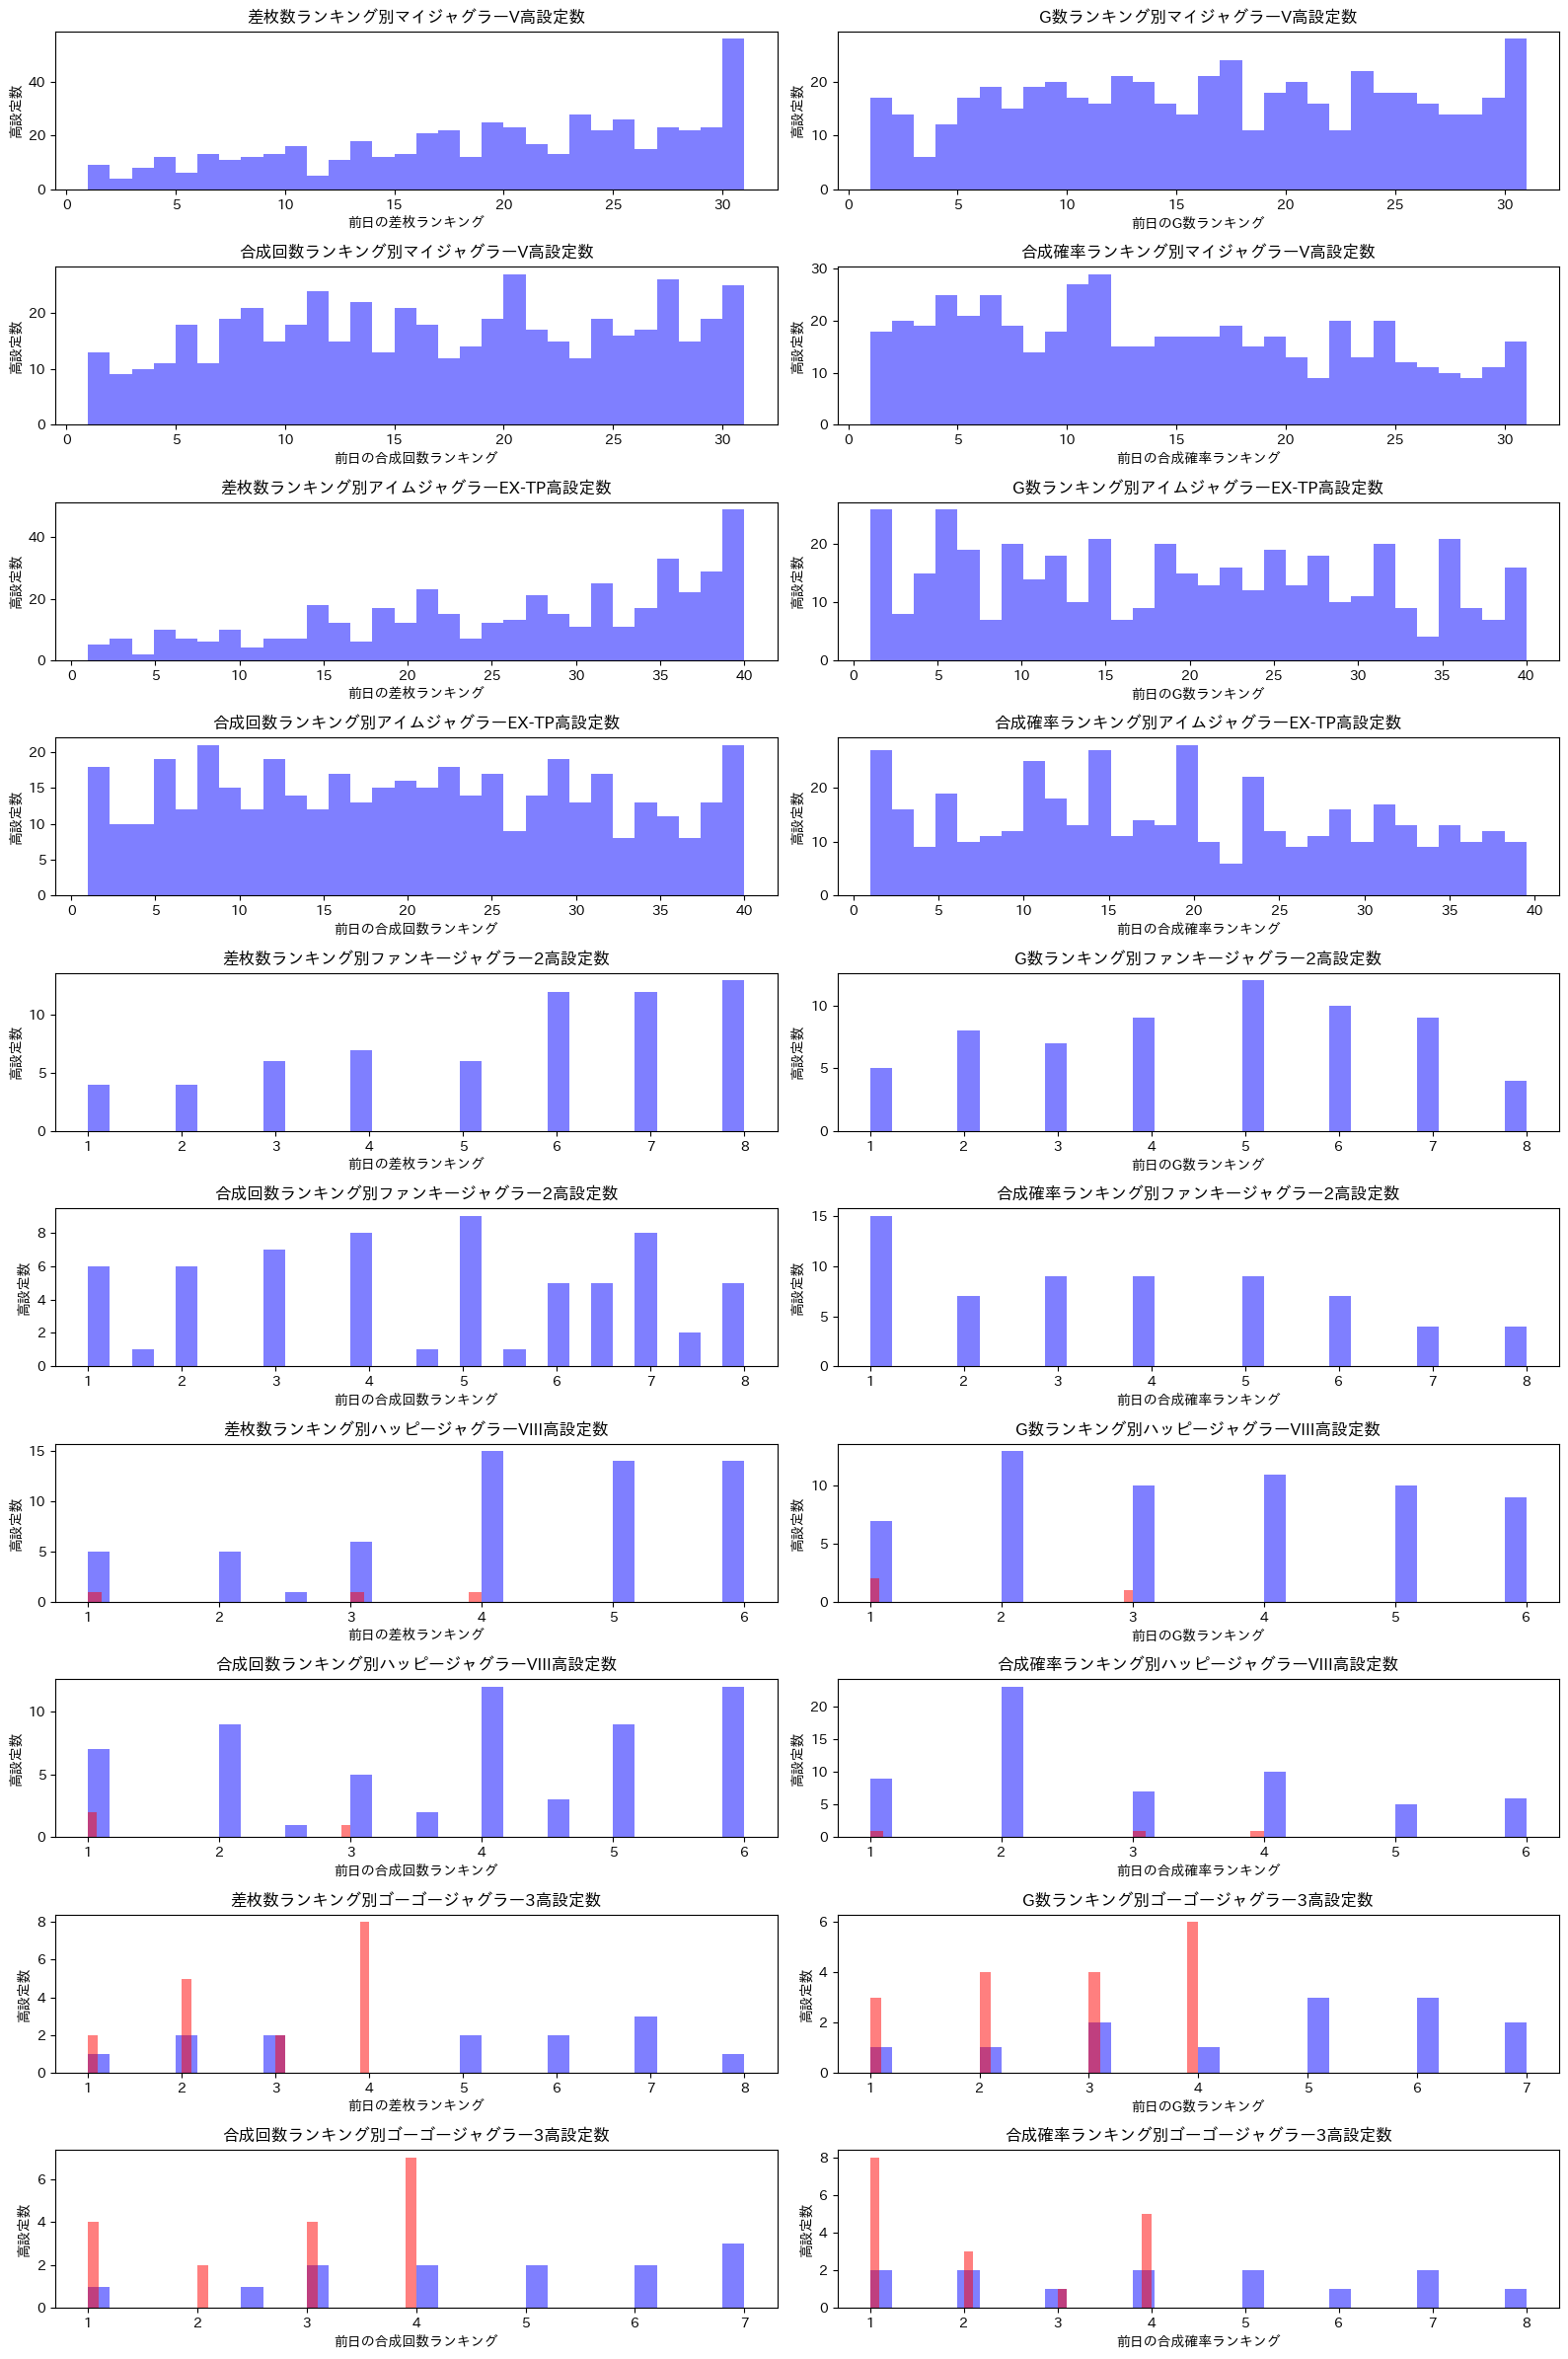

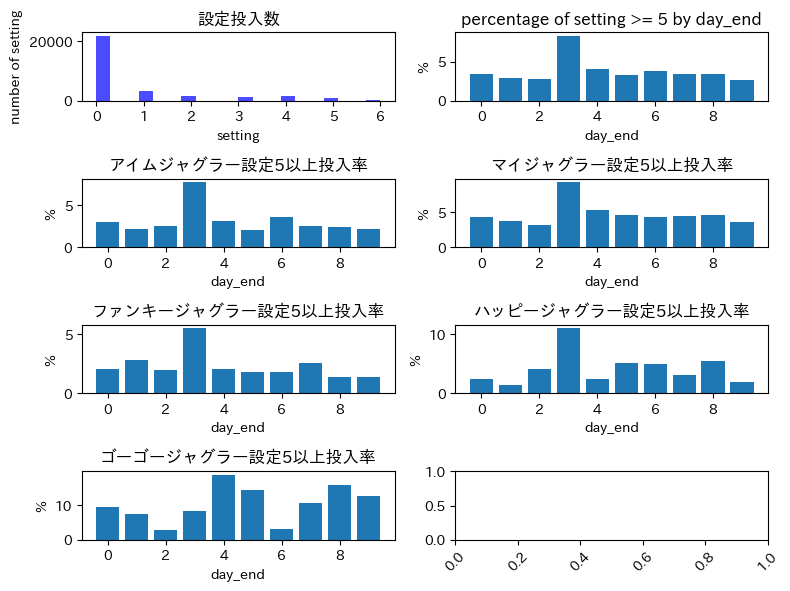

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import japanize_matplotlib
pd.set_option('display.max_rows', 10000)
shop_name="オール湊川"
main_data=pd.read_csv(f"CSV一覧/{shop_name}.csv", encoding="shift-jis")

#分数を変換
main_data['合成確率'] = main_data['合成確率'] .str.replace('1/','')
main_data['合成確率']=main_data['合成確率'].astype('float64')
main_data['BB確率'] = main_data['BB確率'] .str.replace('1/','')
main_data['BB確率']=main_data['BB確率'].astype('float64')
main_data['RB確率'] = main_data['RB確率'] .str.replace('1/','')
main_data['RB確率']=main_data['RB確率'].astype('float64')

#一旦すべて設定１とする
main_data['setting'] = 1
#アイムジャグラー推定設定
main_data.loc[(main_data['RB確率'] <= 399.6) & (main_data['機種名']=="アイムジャグラーEX-TP"),'setting'] = 2
main_data.loc[(main_data['RB確率'] <= 331.0) & (main_data['機種名']=="アイムジャグラーEX-TP"),'setting'] = 3
main_data.loc[(main_data['RB確率'] <= 315.1) & (main_data['機種名']=="アイムジャグラーEX-TP"),'setting'] = 4
main_data.loc[(main_data['RB確率'] <= 255.0) & (main_data['機種名']=="アイムジャグラーEX-TP"),'setting'] = 5
main_data.loc[(main_data['RB確率'] <= 255.0) & (main_data['機種名']=="アイムジャグラーEX-TP") & (main_data["ブドウ確率"]<5.90),'setting'] = 6
main_data.loc[(main_data['G数'] < 5000),'setting'] = 0 #回転数が5000未満は設定0として扱う
#マイジャグラー推定設定
main_data.loc[(main_data['RB確率'] <= 385.5) & (main_data['機種名']=="マイジャグラーV")& ((main_data["ブドウ確率"]<=5.90)|(main_data["BB確率"]<=273.1)),'setting'] = 2
main_data.loc[(main_data['RB確率'] <= 336.1) & (main_data['機種名']=="マイジャグラーV")& ((main_data["ブドウ確率"]<=5.90)|(main_data["BB確率"]<=273.1)),'setting'] = 3
main_data.loc[(main_data['RB確率'] <= 290.0) & (main_data['機種名']=="マイジャグラーV")& ((main_data["ブドウ確率"]<=5.90)|(main_data["BB確率"]<=273.1)),'setting'] = 4
main_data.loc[(main_data['RB確率'] <= 268.6) & (main_data['機種名']=="マイジャグラーV")& ((main_data["ブドウ確率"]<=5.85)|(main_data["BB確率"]<=270.8)),'setting'] = 5
main_data.loc[(main_data['RB確率'] <= 229.1) & (main_data['機種名']=="マイジャグラーV")& ((main_data["ブドウ確率"]<=5.80)|(main_data["BB確率"]<=266.4)),'setting'] = 6
main_data.loc[(main_data['G数'] < 5000),'setting'] = 0 #回転数が5000未満は設定0として扱う
#ファンキージャグラー推定設定
main_data.loc[(main_data['RB確率'] <= 407.1) & (main_data['機種名']=="ファンキージャグラー2") & (main_data["ブドウ確率"]<=5.92),'setting'] = 2
main_data.loc[(main_data['RB確率'] <= 366.1) & (main_data['機種名']=="ファンキージャグラー2") & (main_data["ブドウ確率"]<=5.92),'setting'] = 3
main_data.loc[(main_data['RB確率'] <= 322.8) & (main_data['機種名']=="ファンキージャグラー2") & (main_data["ブドウ確率"]<=5.92),'setting'] = 4
main_data.loc[(main_data['RB確率'] <= 299.3) & (main_data['機種名']=="ファンキージャグラー2") & (main_data["ブドウ確率"]<=5.88),'setting'] = 5
main_data.loc[(main_data['RB確率'] <= 262.1) & (main_data['機種名']=="ファンキージャグラー2") & (main_data["ブドウ確率"]<=5.83),'setting'] = 6
main_data.loc[(main_data['G数'] < 5000),'setting'] = 0 #回転数が5000未満は設定0として扱う
#ハッピージャグラー推定設定
main_data.loc[(main_data['RB確率'] <= 362.08) & (main_data['機種名']=="ハッピージャグラーVIII") & ((main_data["ブドウ確率"]<=6.04)|(main_data["BB確率"]<=273.1)),'setting'] = 2
main_data.loc[(main_data['RB確率'] <= 332.67) & (main_data['機種名']=="ハッピージャグラーVIII") & ((main_data["ブドウ確率"]<=6.04)|(main_data["BB確率"]<=273.1)),'setting'] = 3
main_data.loc[(main_data['RB確率'] <= 300.62) & (main_data['機種名']=="ハッピージャグラーVIII") & ((main_data["ブドウ確率"]<=6.04)|(main_data["BB確率"]<=273.1)),'setting'] = 4
main_data.loc[(main_data['RB確率'] <= 273.07) & (main_data['機種名']=="ハッピージャグラーVIII") & ((main_data["ブドウ確率"]<=6.01)|(main_data["BB確率"]<=270.8)),'setting'] = 5
main_data.loc[(main_data['RB確率'] <= 256.00) & (main_data['機種名']=="ハッピージャグラーVIII") & ((main_data["ブドウ確率"]<=5.98)|(main_data["BB確率"]<=263.2)),'setting'] = 6
main_data.loc[(main_data['G数'] < 5000),'setting'] = 0 #回転数が5000未満は設定0として扱う
#ゴーゴージャグラー推定設定
main_data.loc[(main_data['RB確率'] <= 362.08) & (main_data['機種名']=="ゴーゴージャグラー3") & ((main_data["ブドウ確率"]<=6.04)|(main_data["BB確率"]<=259.0)),'setting'] = 2
main_data.loc[(main_data['RB確率'] <= 332.67) & (main_data['機種名']=="ゴーゴージャグラー3") & ((main_data["ブドウ確率"]<=6.04)|(main_data["BB確率"]<=259.1)),'setting'] = 3
main_data.loc[(main_data['RB確率'] <= 300.62) & (main_data['機種名']=="ゴーゴージャグラー3") & ((main_data["ブドウ確率"]<=6.04)|(main_data["BB確率"]<=259.1)),'setting'] = 4
main_data.loc[(main_data['RB確率'] <= 273.07) & (main_data['機種名']=="ゴーゴージャグラー3") & ((main_data["ブドウ確率"]<=6.01)|(main_data["BB確率"]<=258.0)),'setting'] = 5
main_data.loc[(main_data['RB確率'] <= 256.00) & (main_data['機種名']=="ゴーゴージャグラー3") & ((main_data["ブドウ確率"]<=5.98)|(main_data["BB確率"]<=257.0)),'setting'] = 6
main_data.loc[(main_data['G数'] < 5000),'setting'] = 0 #回転数が4000未満は設定0として扱う

#時刻データに変換
main_data['日付'] = pd.to_datetime(main_data['日付'])
main_data['day_end'] = main_data['日付'].astype(str).str[-1].astype(int) #日付末尾

main_data['合成回数']=main_data['BB回数']+main_data['RB回数']

# 同じ機種名と同じ日付の台数を数えて新しい列に代入
main_data['機種台数'] = main_data.groupby(['機種名', '日付'])['台番号'].transform('count')
machine_nums_list = main_data.groupby('機種名')['機種台数'].unique().reset_index(name='機種台数リスト')
# 前日の差枚、G数、BB確率、RB確率を計算して新しい列に追加
main_data['前日の差枚'] = main_data.groupby("台番号")['差枚'].shift(-1)
main_data['前日のG数'] = main_data.groupby("台番号")['G数'].shift(-1)
main_data['前日のBB確率'] = main_data.groupby("台番号")['BB確率'].shift(-1)
main_data['前日のRB確率'] = main_data.groupby("台番号")['RB確率'].shift(-1)
main_data['翌日'] = main_data['日付'] + pd.Timedelta(days=1)
#前日のランキングを当日の列に反映
ranking_columns=['G数', '差枚', '合成回数', '合成確率']
for ranking_column in ranking_columns:
    main_data[f'{ranking_column}ランキング'] = main_data.groupby(['日付', '機種名'])[ranking_column].rank(ascending=False)
main_data = main_data.merge(main_data[['翌日', '機種名', '台番号', 'G数ランキング', '差枚ランキング', '合成回数ランキング', '合成確率ランキング']], left_on=['日付', '機種名', '台番号'], right_on=['翌日', '機種名', '台番号'], how='left')
main_data = main_data.drop(['翌日_x', 'G数ランキング_x', '差枚ランキング_x', '合成回数ランキング_x', '合成確率ランキング_x'], axis=1)
main_data.columns=['日付', '機種名', '台番号', 'G数', '差枚', 'BB回数', 'RB回数', '合成確率', 'BB確率', 'RB確率',
       'ブドウ確率', 'setting', 'day_end', '合成回数', '機種台数', '前日の差枚', '前日のG数', '前日のBB確率',
       '前日のRB確率', '翌日', '前日のG数ランキング', '前日の差枚ランキング', '前日の合成回数ランキング',
       '前日の合成確率ランキング']

main_data.to_csv(f"{shop_name}-update.csv", index=False, encoding = "shift-jis")

machine_names=["マイジャグラーV", "アイムジャグラーEX-TP", "ファンキージャグラー2", "ハッピージャグラーVIII", "ゴーゴージャグラー3"]
colors=['blue', 'red', 'black', 'green']
# サブプロットを配置
fig, axes = plt.subplots(10, 2, figsize=(16, 24))

for i, machine_name in enumerate(machine_names):
    #対象機種かつ高設定の台のみピックアップする
    filtered_df = main_data[(main_data['機種名'] == machine_name) & (main_data['setting'] >= 5)]
    #対象機種の機種台数リストを作成
    target_machine_num_list=machine_nums_list[machine_nums_list['機種名']==machine_name]['機種台数リスト'].values[0]
    for j, machine_num in enumerate(target_machine_num_list):
        target_num_filtered_df=filtered_df[filtered_df['機種台数']==machine_num]
        # ヒストグラムを作成し配置
        axes[2*i, 0].hist(target_num_filtered_df['前日の差枚ランキング'], bins=30, color=colors[j], alpha=0.5)
        axes[2*i, 0].set_xlabel('前日の差枚ランキング')
        axes[2*i, 0].set_ylabel('高設定数')
        axes[2*i, 0].set_title(f'差枚数ランキング別{machine_name}高設定数')
    
        axes[2*i, 1].hist(target_num_filtered_df['前日のG数ランキング'], bins=30, color=colors[j], alpha=0.5)
        axes[2*i, 1].set_xlabel('前日のG数ランキング')
        axes[2*i, 1].set_ylabel('高設定数')
        axes[2*i, 1].set_title(f'G数ランキング別{machine_name}高設定数')
    
        axes[2*i+1, 0].hist(target_num_filtered_df['前日の合成回数ランキング'], bins=30, color=colors[j], alpha=0.5)
        axes[2*i+1, 0].set_xlabel('前日の合成回数ランキング')
        axes[2*i+1, 0].set_ylabel('高設定数')
        axes[2*i+1, 0].set_title(f'合成回数ランキング別{machine_name}高設定数')
        
        axes[2*i+1, 1].hist(target_num_filtered_df['前日の合成確率ランキング'], bins=30, color=colors[j], alpha=0.5)
        axes[2*i+1, 1].set_xlabel('前日の合成確率ランキング')
        axes[2*i+1, 1].set_ylabel('高設定数')
        axes[2*i+1, 1].set_title(f'合成確率ランキング別{machine_name}高設定数')

display(main_data)
# サブプロット間の横方向のスペースを調整
plt.subplots_adjust(wspace=0.3)  # 各サブプロット間のスペースを調整
# サブプロット間のスペースを調整
plt.tight_layout()
#図を保存
plt.savefig(f'{shop_name}-設定投入傾向.png', dpi=300)

#設定の比率
n_target0, n_target1,n_target2,n_target3,n_target4,n_target5,n_target6= len(main_data[main_data['setting'] == 0]), len(main_data[main_data['setting'] == 1]) , len(main_data[main_data['setting'] == 2]), len(main_data[main_data['setting'] == 3]), len(main_data[main_data['setting'] == 4]), len(main_data[main_data['setting'] == 5]), len(main_data[main_data['setting'] == 6])
n_all = n_target0+n_target1+n_target2+n_target3+n_target4+n_target5+n_target6
print('回転数不足 の割合 :', n_target0/n_all) # target0の割合
print('設定1 の割合 :', n_target1/n_all) # target1の割合
print('設定2 の割合 :', n_target2/n_all) # target2の割合
print('設定3 の割合 :', n_target3/n_all) # target3の割合
print('設定4 の割合 :', n_target4/n_all) # target4の割合
print('設定5 の割合 :', n_target5/n_all) # target5の割合
print('設定6 の割合 :', n_target6/n_all) # target6の割合

# サブプロットを配置
fig, axes = plt.subplots(4, 2, figsize=(8, 6))

# ヒストグラムを作成し配置
axes[0, 0].hist(main_data["setting"], bins=20, color='blue', alpha=0.7)
axes[0, 0].set_xlabel("setting")
axes[0, 0].set_ylabel("number of setting")
axes[0, 0].set_title("設定投入数")

#全データの中で設定5以上の投入率を調べる
# "setting" 列が5以上の行を抽出
setting_upperfive_df = main_data[main_data['setting'] >= 5]
# "day_end" 列ごとに条件を満たす行の数を計算
upperfize_by_day = setting_upperfive_df.groupby('day_end')['setting'].count()
all_by_day = main_data.groupby('day_end')['setting'].count()

percentage_by_day = upperfize_by_day*100/all_by_day
# バーの位置を設定
x = range(len(percentage_by_day))

# バーの高さを設定
y = percentage_by_day.values
axes[0, 1].bar(x, y)
axes[0, 1].set_xlabel('day_end')
axes[0, 1].set_ylabel("%")
axes[0, 1].set_title('percentage of setting >= 5 by day_end')
plt.xticks(rotation=45)  # X軸のラベルを回転させて可読性を向上させる

#アイムジャグラーの高設定投入率を調べる
im_all_df = main_data[main_data["機種名"]=="アイムジャグラーEX-TP"]
im_upperfive_df = im_all_df[im_all_df["setting"]>=5]

upperfize_by_day = im_upperfive_df.groupby('day_end')['setting'].count()
all_by_day = im_all_df.groupby('day_end')['setting'].count()

percentage_by_day =upperfize_by_day*100/all_by_day
# バーの位置を設定
x = range(len(percentage_by_day))

# バーの高さを設定
y = percentage_by_day.values
axes[1, 0].bar(x, y)
axes[1, 0].set_xlabel('day_end')
axes[1, 0].set_ylabel("%")
axes[1, 0].set_title('アイムジャグラー設定5以上投入率')

#マイジャグラーの高設定投入率を調べる
my_all_df = main_data[main_data["機種名"]=="マイジャグラーV"]
my_upperfive_df = my_all_df[my_all_df["setting"]>=5]

upperfize_by_day = my_upperfive_df.groupby('day_end')['setting'].count()
all_by_day = my_all_df.groupby('day_end')['setting'].count()

percentage_by_day =upperfize_by_day*100/all_by_day
# バーの位置を設定
x = range(len(percentage_by_day))

# バーの高さを設定
y = percentage_by_day.values
axes[1, 1].bar(x, y)
axes[1, 1].set_xlabel('day_end')
axes[1, 1].set_ylabel("%")
axes[1, 1].set_title('マイジャグラー設定5以上投入率')

#ファンキージャグラーの高設定投入率を調べる
fanky_all_df = main_data[main_data["機種名"]=="ファンキージャグラー2"]
fanky_upperfive_df = fanky_all_df[fanky_all_df["setting"]>=5]

upperfize_by_day = fanky_upperfive_df.groupby('day_end')['setting'].count()
all_by_day = fanky_all_df.groupby('day_end')['setting'].count()

percentage_by_day =upperfize_by_day*100/all_by_day

# バーの位置を設定
x = range(len(percentage_by_day))

# バーの高さを設定
y = percentage_by_day.values
axes[2, 0].bar(x, y)
axes[2, 0].set_xlabel('day_end')
axes[2, 0].set_ylabel("%")
axes[2, 0].set_title('ファンキージャグラー設定5以上投入率')

#ハッピージャグラーの高設定投入率を調べる
happy_all_df = main_data[main_data["機種名"]=="ハッピージャグラーVIII"]
happy_upperfive_df = happy_all_df[happy_all_df["setting"]>=5]

upperfize_by_day = happy_upperfive_df.groupby('day_end')['setting'].count()
all_by_day = happy_all_df.groupby('day_end')['setting'].count()

percentage_by_day =upperfize_by_day*100/all_by_day
# バーの位置を設定
x = range(len(percentage_by_day))

# バーの高さを設定
y = percentage_by_day.values
axes[2, 1].bar(x, y)
axes[2, 1].set_xlabel('day_end')
axes[2, 1].set_ylabel("%")
axes[2, 1].set_title('ハッピージャグラー設定5以上投入率')

#ゴーゴージャグラーの高設定投入率を調べる
gogo_all_df = main_data[main_data["機種名"]=="ゴーゴージャグラー3"]
gogo_upperfive_df = gogo_all_df[gogo_all_df["setting"]>=5]

upperfize_by_day = gogo_upperfive_df.groupby('day_end')['setting'].count()
all_by_day = gogo_all_df.groupby('day_end')['setting'].count()

percentage_by_day =upperfize_by_day*100/all_by_day
# バーの位置を設定
x = range(len(percentage_by_day))

# バーの高さを設定
y = percentage_by_day.values
axes[3, 0].bar(x, y)
axes[3, 0].set_xlabel('day_end')
axes[3, 0].set_ylabel("%")
axes[3, 0].set_title('ゴーゴージャグラー設定5以上投入率')
# サブプロット間の横方向のスペースを調整
plt.subplots_adjust(wspace=0.3)  # 各サブプロット間のスペースを調整
# サブプロット間のスペースを調整
plt.tight_layout()

# 図を保存
plt.savefig(f'{shop_name}-設定投入率.png', dpi=300)
plt.show()

# zero_by_day.plot(kind='bar', xlabel='day_end', ylabel='Count', title='Count of setting = 0 by day_end')
# plt.xticks(rotation=45)  # X軸のラベルを回転させて可読性を向上させる
# plt.show()

In [65]:
import openpyxl
from openpyxl.styles import PatternFill

# カラムの制限をなくす（全てのカラムを表示）
pd.set_option('display.max_columns', None)

# 日付の末尾がイベ日である行を抽出
target_dates = main_data[main_data['day_end'] == 3]['日付']
machine_names=["マイジャグラーV", "アイムジャグラーEX-TP", "ファンキージャグラー2", "ハッピージャグラーVIII", "ゴーゴージャグラー3"]
# Excelファイルに保存
with pd.ExcelWriter(f'{shop_name}-data.xlsx', engine='openpyxl') as writer:
    for machine_name in machine_names:
        jag_df = main_data[main_data['機種名'] == machine_name]
        filtered_jag_df = jag_df[jag_df['日付'].isin(target_dates) | jag_df['日付'].isin(target_dates - pd.DateOffset(
            days=1)) | jag_df['日付'].isin(target_dates - pd.DateOffset(days=2)) | jag_df['日付'].isin(target_dates - pd.DateOffset(days=3))]
        filtered_jag_df_event = jag_df[jag_df['日付'].isin(target_dates)]

        #日付を変更する際の注意を解消するためにコピーを作成
        jag_df = jag_df.copy()
        filtered_jag_df = filtered_jag_df.copy()
        filtered_jag_df_event = filtered_jag_df_event.copy()

        jag_df['日付'] = jag_df['日付'].dt.strftime('%Y年%m月%d日(%a)')
        filtered_jag_df['日付'] = filtered_jag_df['日付'].dt.strftime('%Y年%m月%d日(%a)')
        filtered_jag_df_event['日付'] = filtered_jag_df_event['日付'].dt.strftime('%Y年%m月%d日(%a)')

        pivot_table_all_samai = jag_df.pivot_table(
            index = '日付', columns = '台番号', values = '差枚')

        pivot_table_all_reg = jag_df.pivot_table(
            index = '日付', columns = '台番号', values = 'RB確率')

        display(jag_df)
        pivot_table_all_big_count=jag_df.pivot_table(
            index = '日付', columns = '台番号', values = 'BB回数')
        pivot_table_all_reg_count=jag_df.pivot_table(
            index = '日付', columns = '台番号', values = 'RB回数')

        pivot_table_all_gassan_count=pivot_table_all_big_count+pivot_table_all_reg_count

        pivot_table_all_game_count= jag_df.pivot_table(
            index = '日付', columns = '台番号', values = 'G数')

        pivot_table_all_setting = jag_df.pivot_table(
            index = '日付', columns = '台番号', values = 'setting')

        pivot_table_sorted_all_setting = pivot_table_all_setting.sort_values(
            by = '日付', ascending = False)

        pivot_table_sorted_all_samai = pivot_table_all_samai.sort_values(
            by = '日付', ascending = False)

        pivot_table_sorted_all_reg =pivot_table_all_reg.sort_values(
            by = '日付', ascending = False)

        pivot_table_sorted_all_gassan_count= pivot_table_all_gassan_count.sort_values(
            by = '日付', ascending = False)

        pivot_table_sorted_all_game_count=pivot_table_all_game_count.sort_values(
            by = '日付', ascending = False)


        pivot_table_all_with_totals = pivot_table_sorted_all_samai.copy()
        pivot_table_all_with_totals.loc['合計'] = pivot_table_all_with_totals.sum()

        pivot_table_samai = filtered_jag_df.pivot_table(
            index = '日付', columns = '台番号', values = '差枚')

        pivot_table_sorted_samai = pivot_table_samai.sort_values(
            by = '日付', ascending = False)

        pivot_table_samai_event = filtered_jag_df_event.pivot_table(
            index = '日付', columns = '台番号', values = '差枚')
        pivot_table_sorted_samai_event = pivot_table_samai_event.sort_values(
            by = '日付', ascending = False)

        pivot_table_event_with_totals = pivot_table_sorted_samai_event.copy()
        pivot_table_event_with_totals.loc['合計'] = pivot_table_event_with_totals.sum()

        pivot_table_game_count = filtered_jag_df.pivot_table(
            index = '日付', columns = '台番号', values = 'G数')
        pivot_table_sorted_game_count = pivot_table_game_count.sort_values(
            by = '日付', ascending = False)

        pivot_table_gassan = filtered_jag_df.pivot_table(
            index = '日付', columns = '台番号', values = '合成確率')
        pivot_table_sorted_gassan = pivot_table_gassan.sort_values(
            by = '日付', ascending = False)

        pivot_table_reg = filtered_jag_df.pivot_table(
            index = '日付', columns = '台番号', values = 'RB確率')
        pivot_table_sorted_reg = pivot_table_reg.sort_values(by='日付', ascending=False)

        pivot_table_setting = filtered_jag_df.pivot_table(
            index = '日付', columns = '台番号', values = 'setting')
        pivot_table_sorted_setting = pivot_table_setting.sort_values(
            by = '日付', ascending = False)

        pivot_table_setting_event = filtered_jag_df_event.pivot_table(
            index = '日付', columns = '台番号', values = 'setting')
        pivot_table_sorted_setting_event = pivot_table_setting_event.sort_values(
            by = '日付', ascending = False)
        pivot_table_sorted_setting_event = pd.DataFrame(
            pivot_table_sorted_setting_event)
        display(pivot_table_sorted_setting_event)
        setting = 5
        count_of_values_above_condition = pivot_table_sorted_setting_event.applymap(
            lambda x: 1 if x >= setting else 0).sum()
        # print(type(count_of_values_above_condition))
        # 新しい行を追加
        pivot_table_sorted_setting_event = pd.concat(
            [pivot_table_sorted_setting_event, count_of_values_above_condition.to_frame().T], ignore_index = False)
        pivot_table_sorted_setting_event.index = pivot_table_sorted_setting_event.index.to_list()[
            : -1] + ['高設定数']

        pivot_table_sorted_all_samai.to_excel(
            writer, sheet_name = f'{machine_name}-全データの差枚', index = True)
        pivot_table_sorted_all_setting.to_excel(
            writer, sheet_name = f'{machine_name}-全データの設定', index = True)
        pivot_table_sorted_all_reg.to_excel(
            writer, sheet_name = f'{machine_name}-全データのREG確率', index=True)
        pivot_table_sorted_all_gassan_count.to_excel(
            writer, sheet_name = f'{machine_name}-全データのボーナス合算回数', index=True)
        pivot_table_sorted_all_game_count.to_excel(
            writer, sheet_name = f'{machine_name}-全データのG数', index=True)

        filtered_jag_df.to_excel(writer, sheet_name='三日前まで含めた全項目データ', index=False)

        pivot_table_event_with_totals.to_excel(
            writer, sheet_name = f'{machine_name}-eventのみの差枚', index = True)
        pivot_table_sorted_setting_event.to_excel(
            writer, sheet_name = f'{machine_name}-eventのみの設定', index = True)

        pivot_table_sorted_samai.to_excel(
            writer, sheet_name = f'{machine_name}-三日前まで含めた差枚', index = True)

        pivot_table_sorted_game_count.to_excel(
            writer, sheet_name = f'{machine_name}-三日前まで含めたG数', index = True)

        pivot_table_sorted_reg.to_excel(
            writer, sheet_name = f'{machine_name}-三日前まで含めたRB確率', index = True)

        pivot_table_sorted_gassan.to_excel(
            writer, sheet_name = f'{machine_name}-三日前まで含めた合算確率', index = True)

        pivot_table_sorted_setting.to_excel(
            writer, sheet_name = f'{machine_name}-三日前まで含めたsetting', index = True)

        workbook = writer.book
        worksheet_all_samai = writer.sheets[f'{machine_name}-全データの差枚']
        worksheet_all_reg = writer.sheets[f'{machine_name}-全データのREG確率']
        worksheet_all_gassan_count= writer.sheets[f'{machine_name}-全データのボーナス合算回数']
        worksheet_all_game_count= writer.sheets[f'{machine_name}-全データのG数']
        worksheet_all_setting = writer.sheets[f'{machine_name}-全データの設定']
        worksheet_setting = writer.sheets[f'{machine_name}-三日前まで含めたsetting']
        worksheet_samai = writer.sheets[f'{machine_name}-三日前まで含めた差枚']
        worksheet_game_count = writer.sheets[f'{machine_name}-三日前まで含めたG数']
        worksheet_reg_probability = writer.sheets[f'{machine_name}-三日前まで含めたRB確率']
        worksheet_total_probability = writer.sheets[f'{machine_name}-三日前まで含めた合算確率']
        worksheet_setting_event = writer.sheets[f'{machine_name}-eventのみの設定']
        worksheet_samai_event = writer.sheets[f'{machine_name}-eventのみの差枚']

        # 値が5以上のセルを赤く塗りつぶす
        red_fill = PatternFill(start_color='FFFF0000',
                               end_color = 'FFFF0000', fill_type = 'solid')
        # 全データ
        for cell in worksheet_all_setting.iter_rows(min_row=2, min_col=2, max_row=len(pivot_table_sorted_all_setting) + 1, max_col=len(pivot_table_sorted_all_setting.columns) + 1):
            for cell in cell:
                if isinstance(cell.value, (int, float)) and cell.value >= 5:
                    cell.fill = red_fill
                    high_setting_row, high_setting_column = cell.row, cell.column
                    worksheet_all_samai.cell(high_setting_row, high_setting_column).fill = red_fill
                    worksheet_all_reg.cell(high_setting_row, high_setting_column).fill = red_fill
                    worksheet_all_game_count.cell(
                        high_setting_row, high_setting_column).fill = red_fill
                    worksheet_all_gassan_count.cell(
                        high_setting_row, high_setting_column).fill = red_fill

        # イベントの三日前まで含めた
        for cell in worksheet_setting.iter_rows(min_row=2, min_col=2, max_row=len(pivot_table_setting) + 1, max_col=len(pivot_table_sorted_setting.columns) + 1):
            for cell in cell:
                if isinstance(cell.value, (int, float)) and cell.value >= 5:
                    cell.fill = red_fill
                    high_setting_row, high_setting_column = cell.row, cell.column
                    worksheet_samai.cell(
                        high_setting_row, high_setting_column).fill = red_fill
                    worksheet_game_count.cell(
                        high_setting_row, high_setting_column).fill = red_fill
                    worksheet_reg_probability.cell(
                        high_setting_row, high_setting_column).fill = red_fill
                    worksheet_total_probability.cell(
                        high_setting_row, high_setting_column).fill = red_fill


        # イベントのみ
        for cell in worksheet_setting_event.iter_rows(min_row=2, min_col=2, max_row=len(pivot_table_setting_event)+1, max_col=len(pivot_table_sorted_setting_event.columns) + 1):
            for cell in cell:
                if isinstance(cell.value, (int, float)) and cell.value >= 5:
                    cell.fill = red_fill
                    high_setting_row, high_setting_column = cell.row, cell.column
                    worksheet_samai_event.cell(
                        high_setting_row, high_setting_column).fill = red_fill



## 機械学習

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit
#特徴量作成
main_data['year'] = main_data['日付'].dt.year #年度
main_data['month'] = main_data['日付'].dt.month #月
main_data['day'] = main_data['日付'].dt.day #日
main_data['weekday'] = main_data['日付'].dt.weekday #曜日
main_data['day_end_2'] = main_data['日付'].astype(str).str[-2].astype(int) #日付2桁目
main_data['day_zoro'] = 0
main_data.loc[main_data['day_end']==main_data['day_end_2'],'day_zoro'] = 1 #ゾロ目を１とする

main_data['machine_end'] = main_data['台番号'].astype(str).str[-1].astype(int) #台番号末尾
main_data['machine_end_2'] = main_data['台番号'].astype(str).str[-2].astype(int) #台番号2桁目
main_data['machine_zoro'] = 0
main_data.loc[main_data['machine_end']==main_data['machine_end_2'],'machine_zoro'] = 1 #台番号ゾロ目を１とする
#設定0を削除してみる
main_data = main_data[main_data['setting'] != 0]
X = main_data.drop(['setting','日付'],axis=1).values
y = main_data['setting'].values
columns_name = main_data.drop(['setting','日付'],axis=1).columns
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0) 

def data_split(X,y):
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
    X_train = pd.DataFrame(X_train, columns=columns_name)
    X_test = pd.DataFrame(X_test, columns=columns_name)

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = data_split(X, y)
X_train, y_train, X_val, y_val = data_split(X_train.values, y_train)

print("train shape", X_train.shape)
print("test shape", X_test.shape)
print("validation shape", X_val.shape)
print(X_train.columns, X_test.columns)
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(y_train)

plt.subplot(1,3,2)
plt.hist(y_test)

plt.subplot(1,3,3)
plt.hist(y_val)

In [5]:
import lightgbm as lgb
import numpy as np
from matplotlib import pyplot as plt
import japanize_matplotlib
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

X_train = X_train.drop(['G数','差枚', '合成確率', 'BB確率', 'RB確率', 'BB回数', 'RB回数', 'ブドウ確率'],axis=1)
X_test = X_test.drop(['G数','差枚', '合成確率', 'BB確率', 'RB確率', 'BB回数', 'RB回数', 'ブドウ確率'],axis=1)
print(X_train.columns)
# 文字列と数値の対応を定義した辞書
mapping = {'アイムジャグラーEX-TP': 1, 'マイジャグラーV': 2, 'ファンキージャグラー2': 3, 'ハッピージャグラーVIII': 4}

#lightgbmを行うために各objectをint、floatに変換
for column in X_train.columns:
    if column=="機種名":
        # '機種名' 列をマップして置き換え
        X_train[column] = X_train[column].map(mapping)
        X_test[column] = X_test[column].map(mapping)
    if column in ['台番号', 'G数', '差枚', 'BB', 'RB', 'year', 'month', 'day', 'weekday', 'day_end', 'day_end_2', 'day_zoro',
       'machine_end', 'machine_end_2', 'machine_zoro', '前日の差枚', '前日のG数']:
        X_train[column] = X_train[column].astype(float)
        X_test[column] = X_test[column].astype(float)
    else:
        X_train[column] = X_train[column].astype(float)
        X_test[column] = X_test[column].astype(float)
y_train = y_train.astype(int)
y_test = y_test.astype(int)
# X_train["差枚"]=X_train["差枚"].astype(int)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

lgb_params = {
             'task': 'train',
             'boosting_type': 'gbdt',
             'objective': 'multiclass', # 目的 : 多クラス分類 
             'num_class': 7, # クラス数 : 7
             'metric': {'multi_error'}, # 評価指標 : 誤り率(= 1-正答率) # 他には'multi_logloss'など
             
             }


model = lgb.train(lgb_params,
                 train_set=lgb_train, # トレーニングデータの指定
                 valid_sets=lgb_eval, # 検証データの指定
                 )

# テストデータの予測 ((各クラスの予測確率 を返す))
y_pred_prob = model.predict(X_test)
# テストデータの予測 (予測クラスを返す)
y_pred = np.argmax(y_pred_prob, axis=1) # 一番大きい予測確率のクラスを予測クラスに


lgb.plot_importance(model, height=0.5, figsize=(8,16))

In [6]:
# 真値と予測値の表示
df_pred = pd.DataFrame({'target':y_test,'target_pred':y_pred})
display(df_pred)

# 真値と予測確率の表示
df_pred_prob = pd.DataFrame({'y':y_test, 'target0_prob':y_pred_prob[:,0], 'target1_prob':y_pred_prob[:,1], 'target2_prob':y_pred_prob[:,2], 'target3_prob':y_pred_prob[:,3]
                            , 'target4_prob':y_pred_prob[:,4], 'target5_prob':y_pred_prob[:,5], 'target6_prob':y_pred_prob[:,6]})
display(df_pred_prob)


In [7]:
# モデル評価
# acc : 正答率
acc = accuracy_score(y_test,y_pred)
print('Acc :', acc)

In [167]:
from bs4 import BeautifulSoup

html = '''
<div class="table-row">
<div class="table-data-cell"><a href="https://ana-slo.com/%e3%83%9b%e3%83%bc%e3%83%ab%e3%83%87%e3%83%bc%e3%82%bf/%e5%85%b5%e5%ba%ab%e7%9c%8c/123%e4%b8%89%e6%9c%a8%e5%ba%97-%e3%83%87%e3%83%bc%e3%82%bf%e4%b8%80%e8%a6%a7/">123三木店</a></div>
<div class="table-data-cell">三木市</div>
</div>
'''

# BeautifulSoupでHTMLを解析
soup = BeautifulSoup(html, 'html.parser')
print(soup)
# 1つ目の<div>内の<a>タグのテキストを取得
first_div_text = soup.find('div', class_='table-row').find('div', class_='table-data-cell').a.text

# 2つ目の<div>内のテキストを取得
second_div_text = soup.find('div', class_='table-row').find_all('div', class_='table-data-cell')[1].text

# 結果を出力
print("1つ目の<div>内の<a>タグのテキスト:", first_div_text)
print("2つ目の<div>内のテキスト:", second_div_text)


In [182]:
!pip install openpyxl
